In [849]:
%matplotlib inline
%load_ext autoreload
%autoreload
import os
import sys
ROOT_DIR = os.path.abspath("../")
PROCESSED_PATH = os.path.join(ROOT_DIR, "../data/processed/")
MODEL_PATH = os.path.join(ROOT_DIR,"../models/")


sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR,"experiments"))
sys.path.append(os.path.join(ROOT_DIR,"deprecated"))
sys.path.append(os.path.join(ROOT_DIR,"preprocessing"))

import torch
import pickle
import time
import numpy as np
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import  DataLoader

from preprocessing.utils import visualise_image

from experiments.model import   SimpleUNet, Unet
from experiments.evaluation_metrics import DistanceViaMean, DistanceViaMode, LossMetric , IoUMetric
from experiments.training_tracker import  TrainingTracker
from experiments.load_data import DataFromH5py, ResizeSample , ToTensor, RandomCropWithAspectRatio, RandomHorizontalFlip, RandomNoise, RandomRotation
from experiments.early_stopper import EarlyStopper
from deprecated.experiment import main_func


os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print(device)


data_name= 'Crossing1_sm'



###### PARAMETERS #######
model_name = "Unet_MI_2ndGen_{}".format(data_name)
num_epochs = 200
batch_size = 32
learning_rate = 0.01
eval_percent = 0.1
patience = 5

input_types = ['masks', 'images']
number_of_inputs = 12


eval_batch_size = 128



#Retrieving files
dataset_file = os.path.join(PROCESSED_PATH, "{}/{}_dataset.hdf5".format(data_name,data_name))
idx_sets_file = os.path.join(PROCESSED_PATH, "{}/{}_sets.pickle".format(data_name,data_name))

#Saving files, folders
model_folder = os.path.join(MODEL_PATH, "{}/".format(model_name))
model_file = os.path.join(MODEL_PATH, "{}/{}.pkl".format(model_name,model_name))
model_history_file = os.path.join(MODEL_PATH, "{}/{}_history.pickle".format(model_name,model_name))
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cpu


In [850]:
idx_sets = pickle.load( open(idx_sets_file, "rb" ) )

train_set = DataFromH5py(dataset_file,idx_sets,input_type = input_types, transform = RandomNoise() )#

In [851]:
frame =4 #np.random.randint(len(train_set))
sample = train_set[frame]
raw_sample = train_set.get_raw(frame)

In [852]:
sample_inputs = sample['input']
sample_label = sample['label']

In [853]:
raw_sample_inputs = raw_sample['input']
raw_sample_label = raw_sample['label']

In [854]:
print(np.max(sample_inputs) ,np.min(sample_inputs))

255.0 0.0


In [855]:
print(np.max(raw_sample_inputs[4]) ,np.min(raw_sample_inputs[4]))

255 0


In [856]:
print(sample_inputs.shape, sample_label.shape, sample_inputs.shape[0]/sample_label.shape[1])

(256, 455, 12) (256, 455) 0.5626373626373626


In [857]:
print(raw_sample_inputs[0].shape, raw_sample_label.shape, raw_sample_inputs[0].shape[0]/ raw_sample_inputs[0].shape[1])

(256, 455) (256, 455) 0.5626373626373626


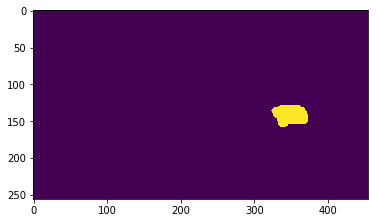

In [858]:
visualise_image(sample_inputs[:,:,0])

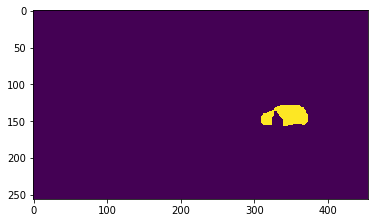

In [859]:
visualise_image(sample_inputs[:,:,1])

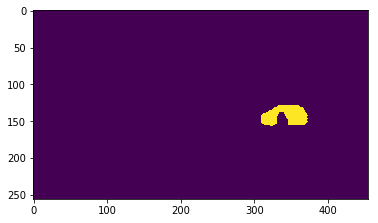

In [860]:
visualise_image(sample_inputs[:,:,2])

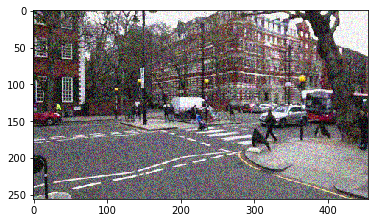

In [861]:
visualise_image(sample_inputs[:,:,3:6]/255)

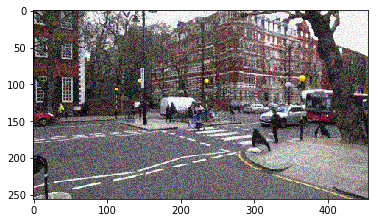

In [862]:
visualise_image(sample_inputs[:,:,6:9]/255)

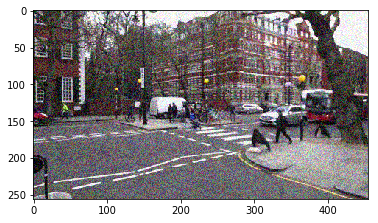

In [863]:
visualise_image(sample_inputs[:,:,9:]/255)

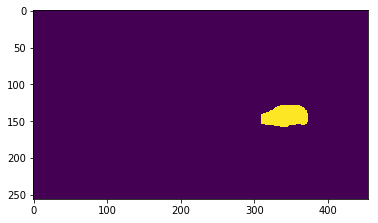

In [864]:
visualise_image(sample_label[:,:])

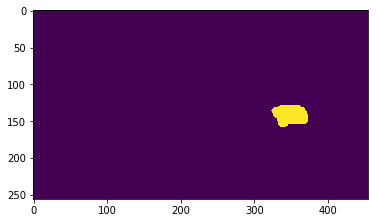

In [865]:
visualise_image(raw_sample_inputs[0])

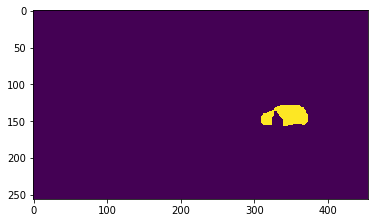

In [866]:
visualise_image(raw_sample_inputs[1])

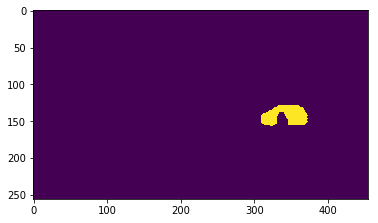

In [867]:
visualise_image(raw_sample_inputs[2])

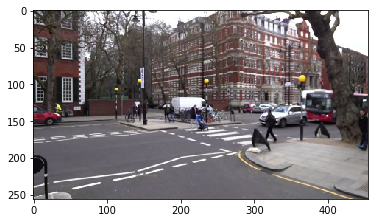

In [868]:
visualise_image(raw_sample_inputs[3])

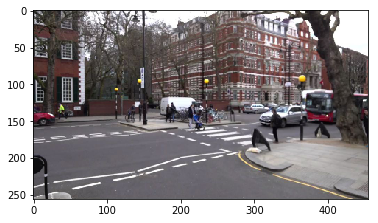

In [869]:
visualise_image(raw_sample_inputs[4])

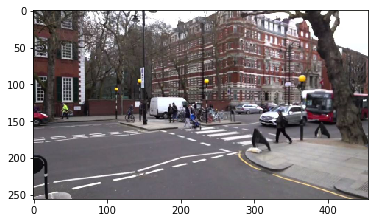

In [870]:
visualise_image(raw_sample_inputs[5])

In [871]:
print(labels.shape)
loss = criterion(outputs, labels)

print(np.sum(np.square(outputs.detach().numpy()[2,0,:,:] - labels.detach().numpy()[2,0,:,:])))

print(loss)

print(outputs.detach().numpy()[2,0,:,:])

print(np.sum(outputs.detach().numpy()[2,0,:,:]))

visualise_image(outputs.detach().numpy()[1,0,:,:] )
visualise_image(labels.detach().numpy()[1,0,:,:])
print(np.unique(labels.detach().numpy()[1,0,:,:]))

print(np.sum(labels.detach().numpy()[2,0,:,:]))

NameError: name 'labels' is not defined

In [ ]:
def plot_metrics(metric, metric_name):
    plt.plot(np.arange(len(metric)), metric)
    plt.xlabel('batches')
    plt.ylabel(metric_name)
    plt.title('{} vs training time'.format(metric_name))
    plt.yscale('log')
    
    
    save_path = os.path.join(model_folder, "{}_plot.jpg".format(metric_name))
    
    plt.savefig(save_path)
    plt.show()
    plt.close()

In [ ]:
plot_metrics(running_loss)

In [ ]:
plot_metrics(running_distance)

In [ ]:
for i in range(len(dataset)):
    print(i)
    sample = dataset[i]
    print(sample['input'].size(),sample['label'].size())

In [ ]:
for i, data in enumerate(dataloader):
        # get the inputs
        inputs = data['input']
        labels = data['label']
        labels = labels.unsqueeze(1)

In [ ]:
import pickle

In [ ]:
history = pickle.load( open( model_history_file, "rb" ) )

In [ ]:
print(history)

In [ ]:
plot_metrics(history['mean_dist'],'distance of the mean centroid')

In [ ]:
plot_metrics(history['mode_dist'],'distance of the mode centroid')

In [ ]:
plot_metrics(history['loss'], 'MSE')

In [ ]:
training_tracker = pickle.load(open(model_history_file, "rb"))

In [ ]:
tracker2 = TrainingTracker()

In [ ]:
tracker2.metrics = training_tracker.metrics

In [ ]:
tracker2.metrics['val_dist_mean'][0]

In [ ]:
tracker2.plot_all(eval_plots_file)

In [ ]:
print(list(training_tracker.metrics.keys()))
print(max(training_tracker.metrics['train_dist_mean']))

In [ ]:
train_loss_file = os.path.join(model_folder, "_train_loss.png")

training_tracker.plot_metric('train_loss',  y_label= False, title = False , log = False, save_path = False)

In [ ]:
train_loss_file = os.path.join(model_folder, "_train_mean_dist.png")

training_tracker.plot_metric('train_dist_mean',  y_label= False, title = False , log = False, save_path = False)

In [ ]:
train_loss_file = os.path.join(model_folder, "_train_mode_dist.png")

training_tracker.plot_metric('train_dist_mode',  y_label= False, title = False , log = False, save_path = False)

In [ ]:
train_loss_file = os.path.join(model_folder, "_val_loss.png")

training_tracker.plot_metric('val_loss',  y_label= False, title = False , log = False, save_path = False)

In [ ]:
train_loss_file = os.path.join(model_folder, "_val_mean_dist.png")

training_tracker.plot_metric('val_loss',  y_label= False, title = False , log = False, save_path = False)